# Data Visualization

## Where the data at?

In [1]:
## Where the data at?
input_path = '../Data/Processed_Data/Cell_Deconvolution/'
output_path = '../Data/Processed_Data/Cell_Deconvolution/'

## Which score is this?

In [2]:
score_name = 'NK'

## Import Libraries

In [3]:
import pandas as pd
import seaborn as sns

# Set theme
sns.set_theme(style='white')

# Import Plotting Functions
from FM_Functions.Data_Visualization import *

## Load Datasets

In [4]:
import pandas as pd

y_train = pd.read_csv(input_path+'y_plus_cibersortx_ARICresults_'+ 'ARIC_mC_score' +'.csv', index_col=0)
y_test = pd.read_csv(input_path+'y_plus_cibersortx_ARICresults_'+ 'ARIC_mC_score' +'_test.csv', index_col=0)

In [5]:
def categorize_cells (df, cell_type, i):
    """Categorizes cell types into high and low levels of expression.

    Parameters:
    ----------
    df: object
        Dataframe to add your results to.
    cell_type: str
        Name of the cell type to be categorized.
    i: str | float
        Use 'median', 'mean', 'top 25%', or float between 0 and 1 for cutoff percentile.

    Returns:
    --------
        A dataframe with calculated quantitative and categorical score/model predictions
        and the value of the cutoff on the continuous variable.

    """
    if i == 'median':
        i = np.median(df[cell_type])
    elif i == 'mean':
        i = np.mean(df[cell_type])
    elif i == 'top 25%':
        i = np.quantile(df[cell_type], 0.75)
    else:
        i = i

    # Binarize score
    df[cell_type + ' Categorical'] = pd.cut(df[cell_type],
                                             bins=[-np.inf, i, np.inf],
                                             labels=['Low', 'High'])

    df[cell_type + '_cat_bin'] = pd.cut(df[cell_type],
                                         bins=[-np.inf, i, np.inf],
                                         labels=[0, 1])
    return df

# Categorize cell types
y_train = categorize_cells(y_train, 'NK', 'top 25%')
y_test = categorize_cells(y_test, 'NK', 'top 25%')

## Kaplan Meiers

c:\Users\flourenco\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:792: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = leg.legendHandles
c:\Users\flourenco\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:792: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = leg.legendHandles


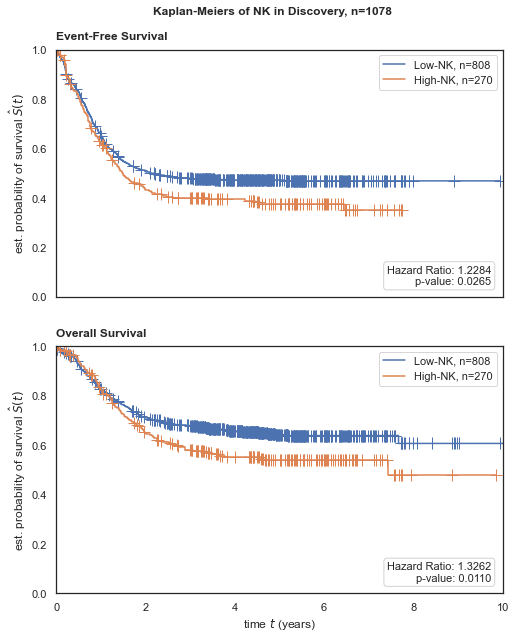

c:\Users\flourenco\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:792: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = leg.legendHandles
c:\Users\flourenco\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:792: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = leg.legendHandles


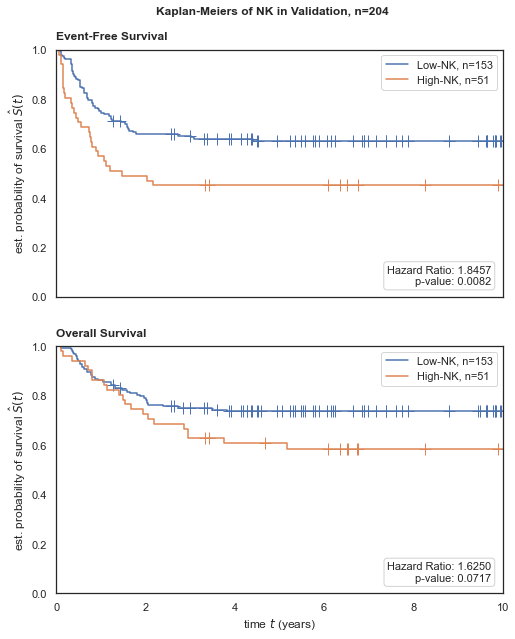

In [22]:

draw_kaplan_meier(scorename=score_name,
                        df=y_train,
                        save_plot=False,
                        add_risk_counts=False,
                        trialname='Discovery')

draw_kaplan_meier(scorename=score_name,
                        df=y_test,
                        save_plot=False,
                        add_risk_counts=False,
                        trialname='Validation')

## Forest Plots

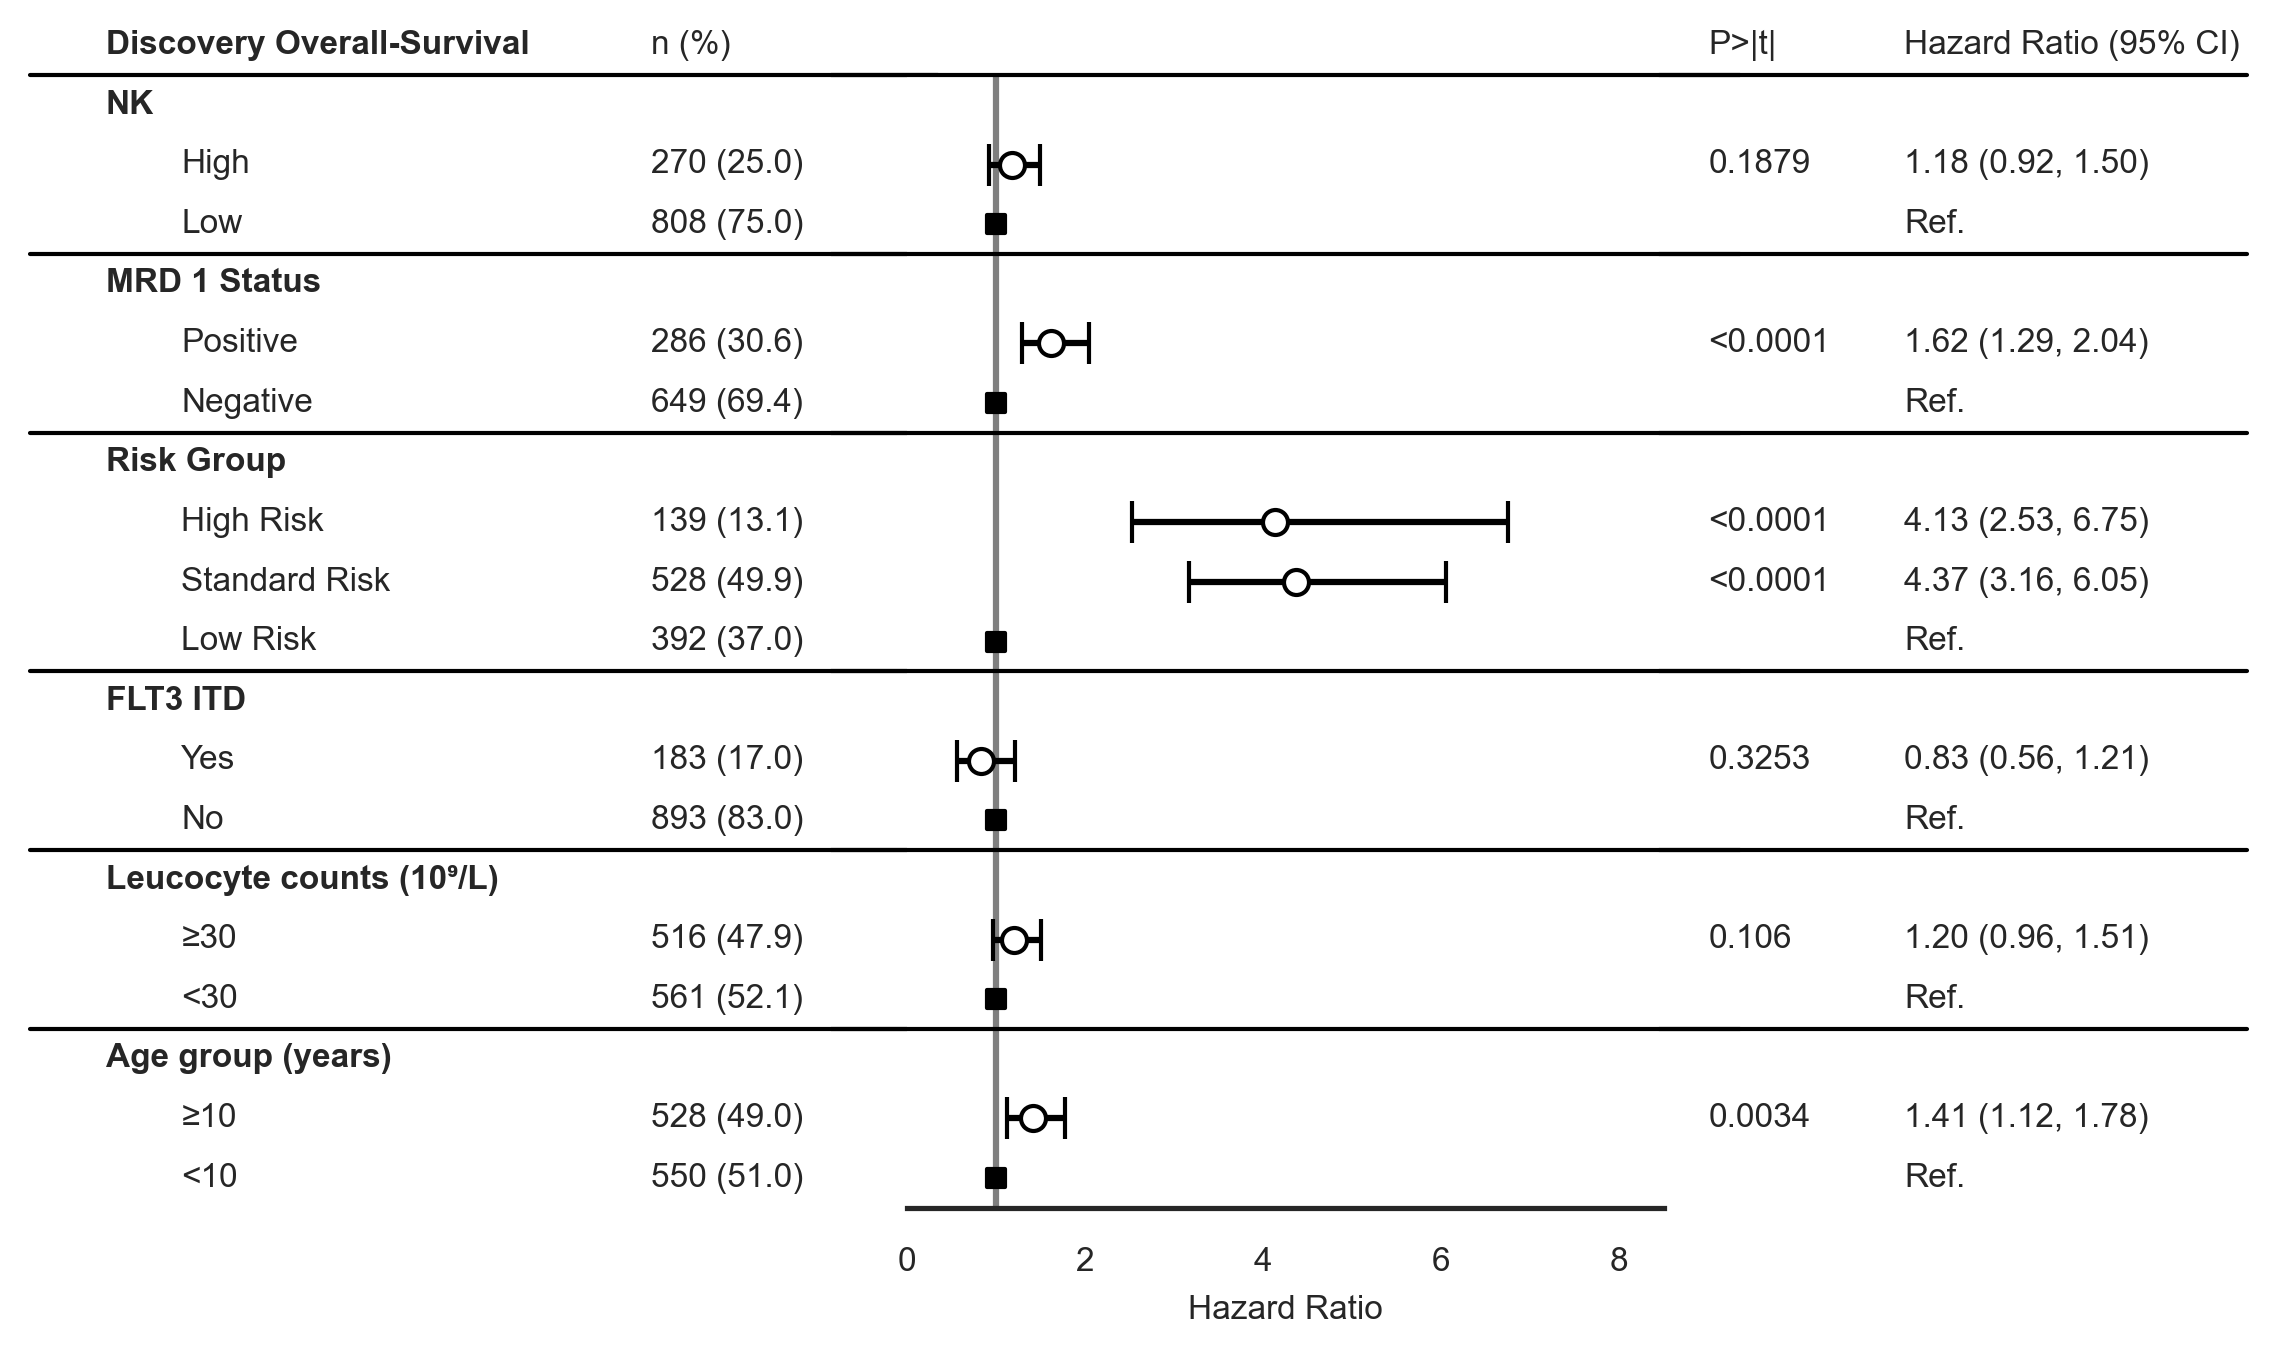

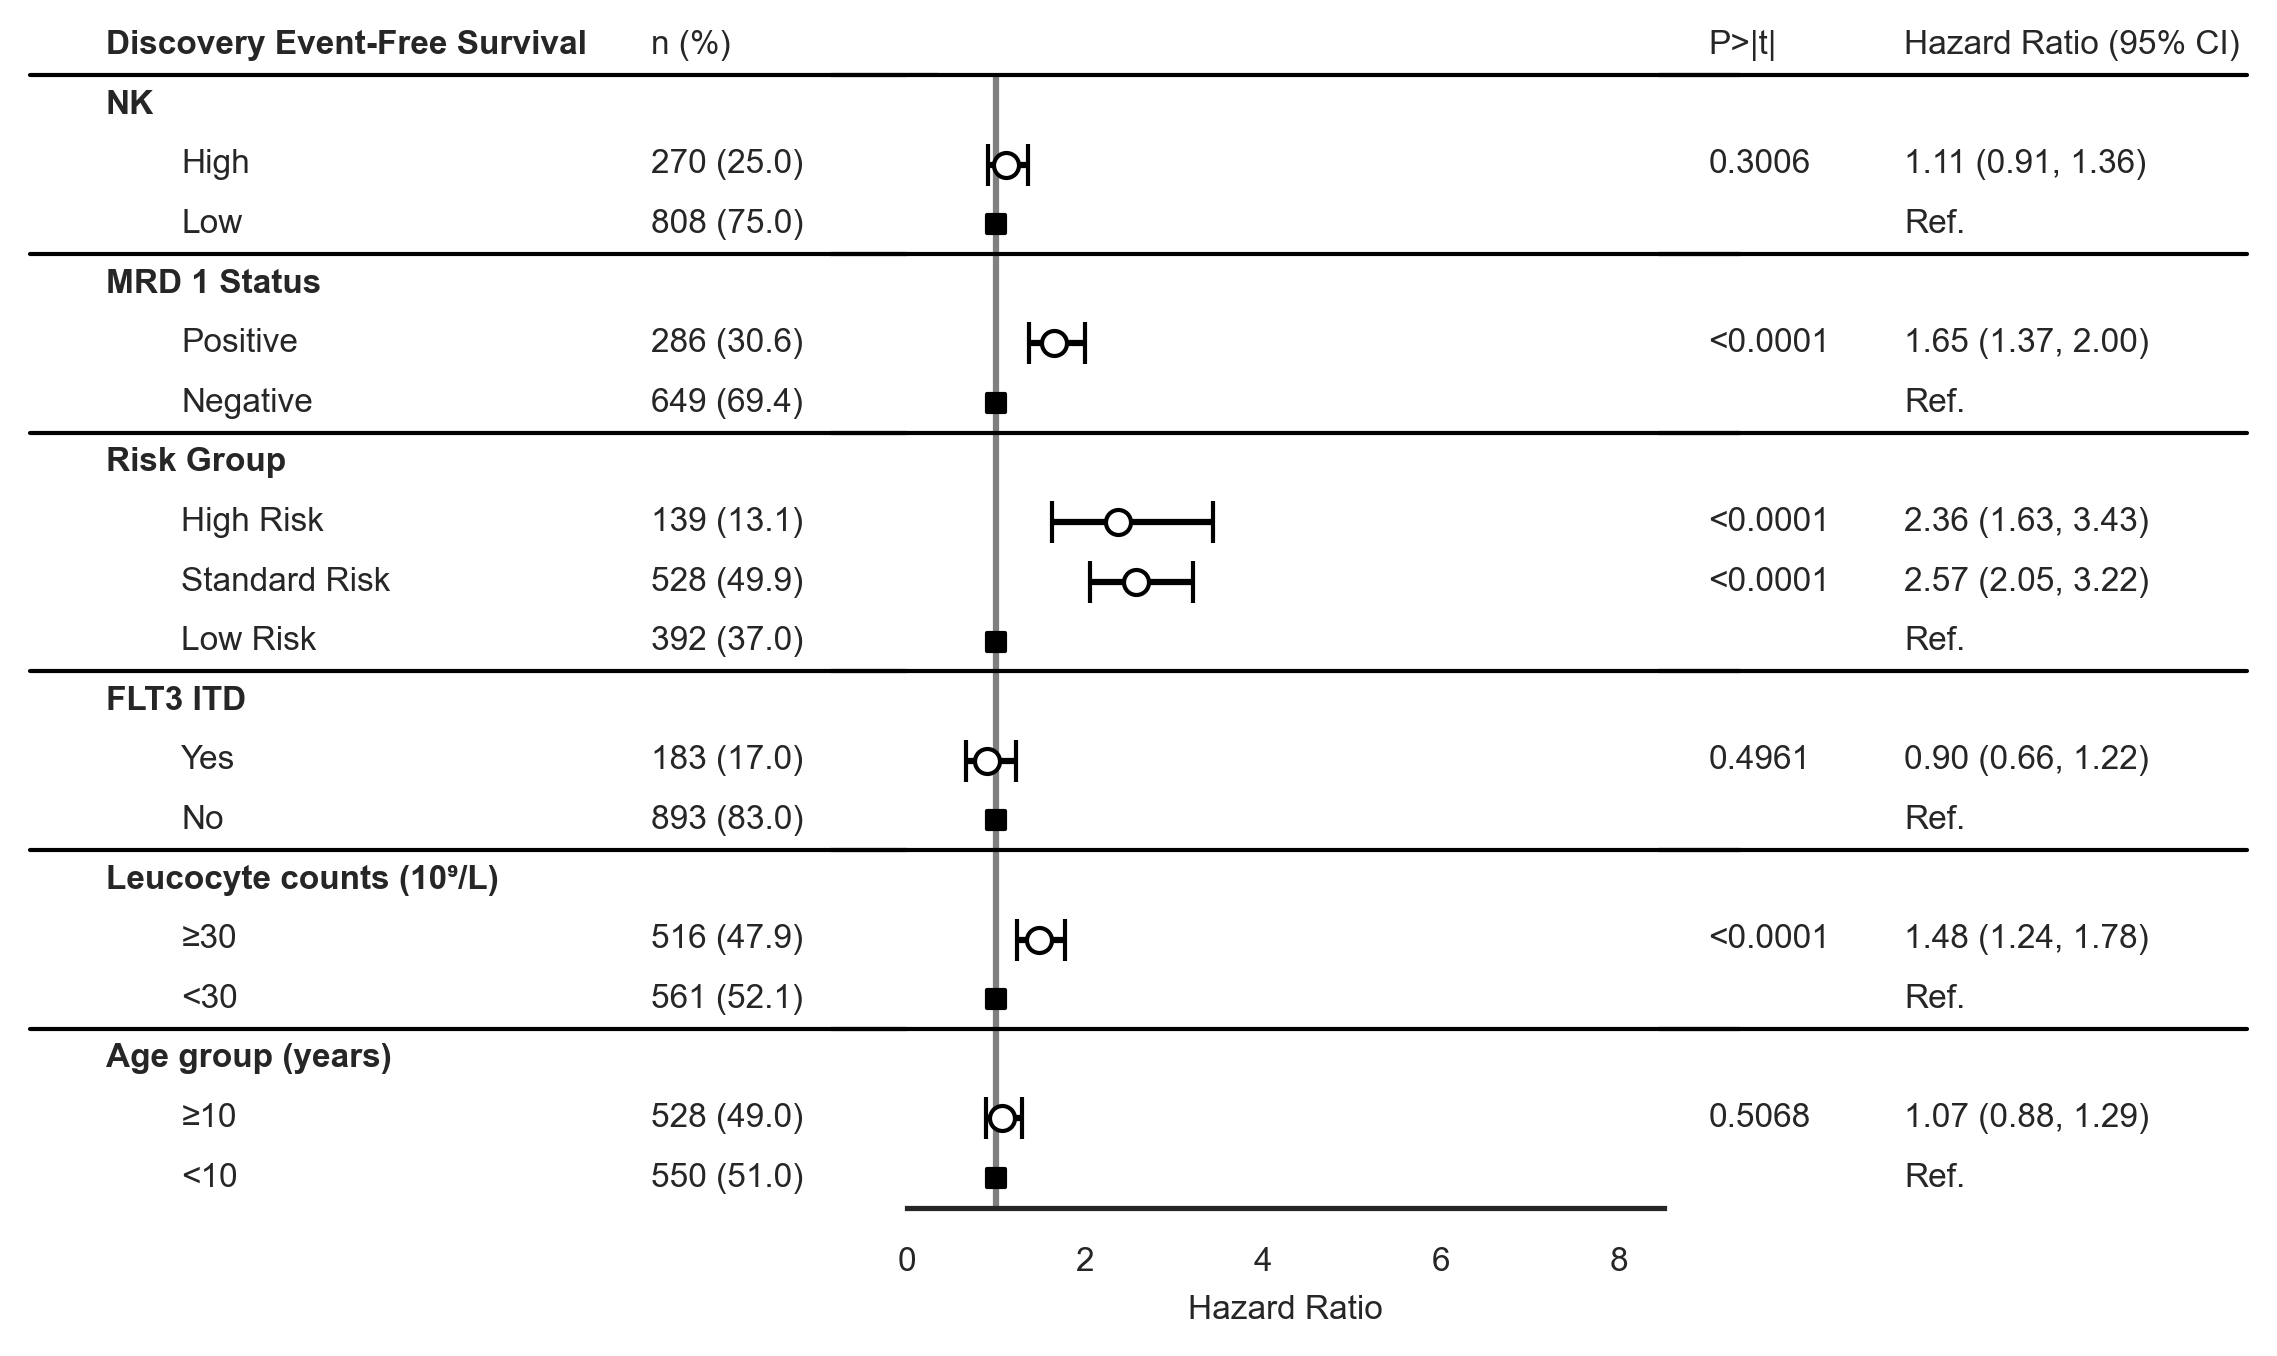

In [7]:
draw_forest_plot(time='os.time',
                    event='os.evnt',
                    df=y_train,
                    trialname='Discovery',
                    scorename=score_name,
                    save_plot=False)
draw_forest_plot(time='efs.time',
                    event='efs.evnt',
                    df=y_train,
                    trialname='Discovery',
                    scorename=score_name,
                    save_plot=False)



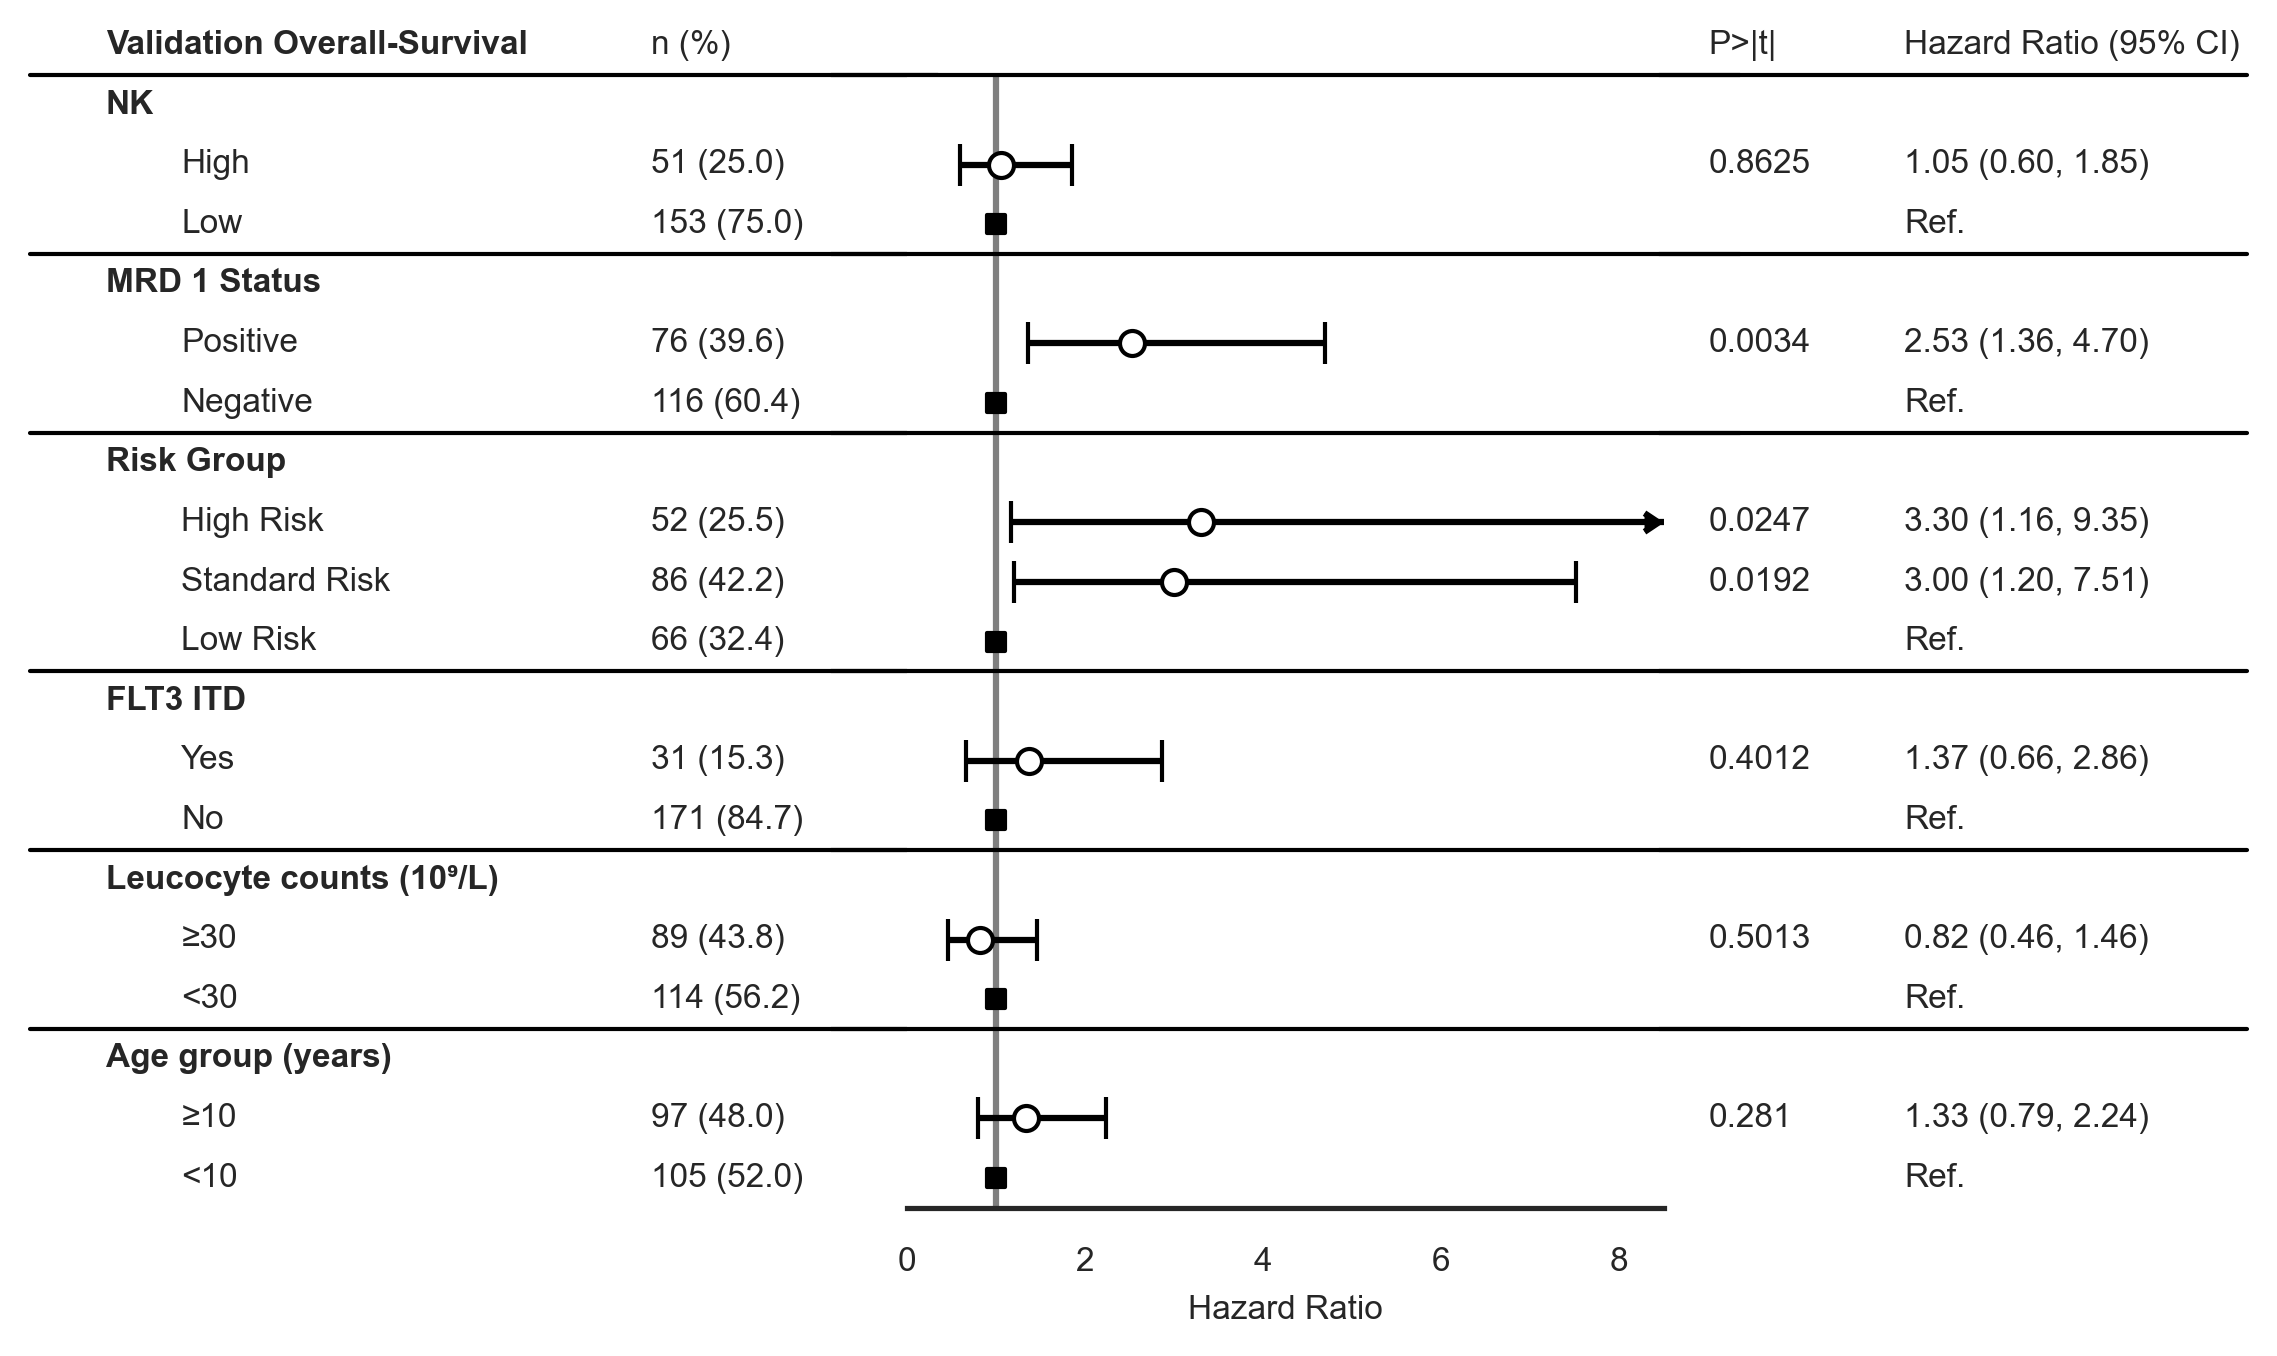

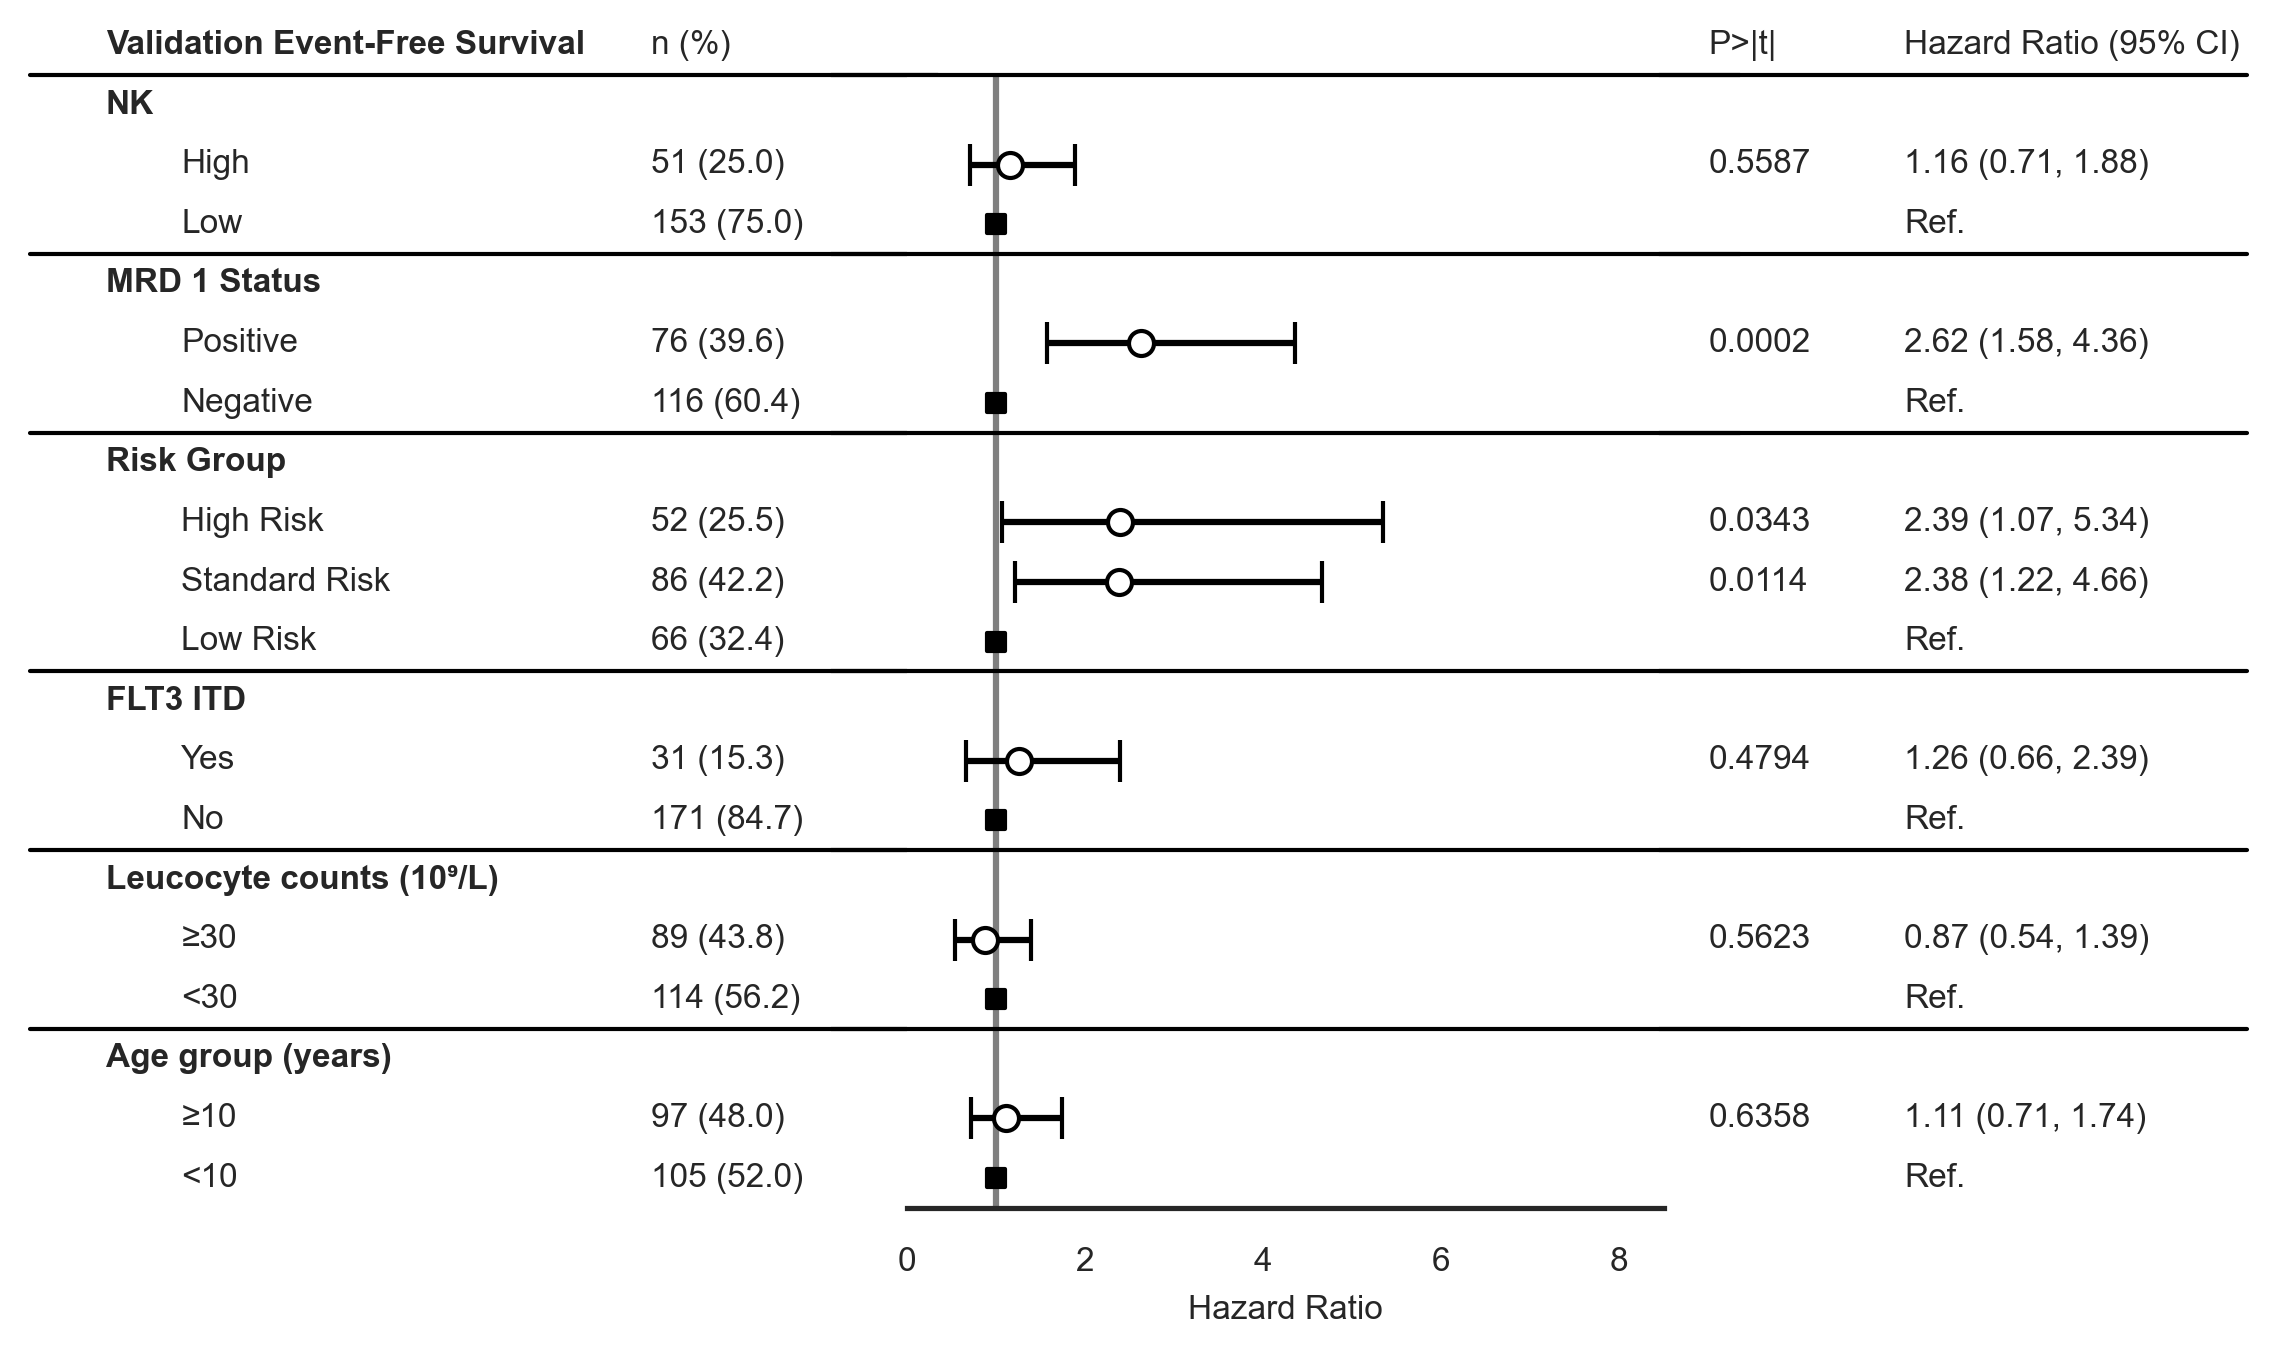

In [8]:
draw_forest_plot(time='os.time',
                    event='os.evnt',
                    df=y_test,
                    trialname='Validation',
                    scorename=score_name,
                    save_plot=True)
draw_forest_plot(time='efs.time',
                    event='efs.evnt',
                    df=y_test,
                    trialname='Validation',
                    scorename=score_name,
                    save_plot=True)

## Patient Characteristics Table

In [9]:
from tableone import TableOne

In [10]:
df_all = pd.concat([y_train,y_test], join='outer',keys=['StJude (Discovery)','COG (Validation)']).reset_index(level=0, names='cohort')

In [11]:
columns = ['Age (years)','Age group (years)','Sex','Race or ethnic group',
            'Hispanic or Latino ethnic group', 'MRD 1 Status',
            'Vital Status', 'Leucocyte counts (10⁹/L)',
            'Risk Group','FLT3 ITD']

In [23]:
mytable_all = TableOne(df_all, columns,overall=False,missing=False,pval=False,
                        order={'FLT3 ITD':['Yes','No'],
                                'Race or ethnic group':['White','Black or African American','Asian'],
                                'MRD 1 Status': ['Positive'],
                                'Risk Group': ['High Risk', 'Standard Risk'],
                                'FLT3 ITD': ['Yes'],
                                'Leucocyte counts (10⁹/L)': ['≥30'],
                                'Age group (years)': ['≥10']},
                        groupby='cohort')
mytable_all.tabulate(tablefmt="html", headers=[score_name,"",'StJude (Validation)','COG (Discovery)'])

NK,,StJude (Validation),COG (Discovery)
n,,204,1078
"Age (years), mean (SD)",,8.8 (6.0),9.4 (6.4)
"Age group (years), n (%)",≥10,97 (48.0),528 (49.0)
,<10,105 (52.0),550 (51.0)
"Sex, n (%)",Female,86 (42.2),538 (49.9)
,Male,118 (57.8),540 (50.1)
"Race or ethnic group, n (%)",White,143 (70.8),796 (79.5)
,Black or African American,35 (17.3),117 (11.7)
,Asian,1 (0.5),49 (4.9)
,Native Hawaiian or other Pacific Islander,2 (1.0),6 (0.6)


In [13]:
columns2 = ['Age (years)','Age group (years)','Sex','Race or ethnic group',
            'Hispanic or Latino ethnic group', 'MRD 1 Status',
            'Leucocyte counts (10⁹/L)', 'BM Leukemic blasts (%)',
            'Risk Group', 'Clinical Trial','FLT3 ITD']

In [24]:
mytable_cog = TableOne(y_test, columns2,
                        overall=False, missing=True,
                        pval=True, pval_adjust=False,
                        htest_name=True,dip_test=True,
                        tukey_test=True, normal_test=True,

                        order={'FLT3 ITD':['Yes','No'],
                                'Race or ethnic group':['White','Black or African American','Asian'],
                                'MRD 1 Status': ['Positive'],
                                'Risk Group': ['High Risk', 'Standard Risk'],
                                'FLT3 ITD': ['Yes'],
                                'Leucocyte counts (10⁹/L)': ['≥30'],
                                'Age group (years)': ['≥10']},
                        groupby=score_name + ' Categorical')
mytable_cog.tabulate(tablefmt="html", 
                        headers=[score_name,"",'Missing','Low','High','p-value','Statistical Test'])

NK,,Missing,Low,High,p-value,Statistical Test
n,,,153,51,,
"Age (years), mean (SD)",,2,9.0 (5.9),8.2 (6.2),0.433,Two Sample T-test
"Age group (years), n (%)",≥10,2,78 (51.3),19 (38.0),0.141,Chi-squared
,<10,,74 (48.7),31 (62.0),,
"Sex, n (%)",Female,0,62 (40.5),24 (47.1),0.513,Chi-squared
,Male,,91 (59.5),27 (52.9),,
"Race or ethnic group, n (%)",White,2,109 (72.2),34 (66.7),0.542,Chi-squared (warning: expected count < 5)
,Black or African American,,27 (17.9),8 (15.7),,
,Asian,,1 (0.7),,,
,Native Hawaiian or other Pacific Islander,,1 (0.7),1 (2.0),,


In [15]:
columns3 = ['Age (years)','Age group (years)','Sex','Race or ethnic group',
            'Hispanic or Latino ethnic group', 'MRD 1 Status',
            'Leucocyte counts (10⁹/L)', 'BM Leukemic blasts (%)',
            'Risk Group','FLT3 ITD',
            'Treatment Arm']

In [25]:
mytable_aml02 = TableOne(y_train, columns3,
                        overall=False, missing=True,
                        pval=True, pval_adjust=False,
                        htest_name=True,dip_test=True,
                        tukey_test=True, normal_test=True,

                        order={'FLT3 ITD':['Yes','No'],
                                'Race or ethnic group':['White','Black or African American','Asian'],
                                'MRD 1 Status': ['Positive'],
                                'Risk Group': ['High Risk', 'Standard Risk'],
                                'FLT3 ITD': ['Yes'],
                                'Leucocyte counts (10⁹/L)': ['≥30'],
                                'Age group (years)': ['≥10']},
                        groupby= score_name + ' Categorical')
mytable_aml02.tabulate(tablefmt="html",
                        headers=[score_name,"",'Missing','Low','High','p-value','Statistical Test'])

NK,,Missing,Low,High,p-value,Statistical Test
n,,,808,270,,
"Age (years), mean (SD)",,0,9.3 (6.5),9.7 (6.0),0.412,Two Sample T-test
"Age group (years), n (%)",≥10,0,384 (47.5),144 (53.3),0.113,Chi-squared
,<10,,424 (52.5),126 (46.7),,
"Sex, n (%)",Female,0,410 (50.7),128 (47.4),0.380,Chi-squared
,Male,,398 (49.3),142 (52.6),,
"Race or ethnic group, n (%)",White,77,599 (80.0),197 (78.2),0.808,Chi-squared (warning: expected count < 5)
,Black or African American,,84 (11.2),33 (13.1),,
,Asian,,36 (4.8),13 (5.2),,
,American Indian or Alaska Native,,3 (0.4),2 (0.8),,


## Bar Plots

In [17]:
import numpy as np

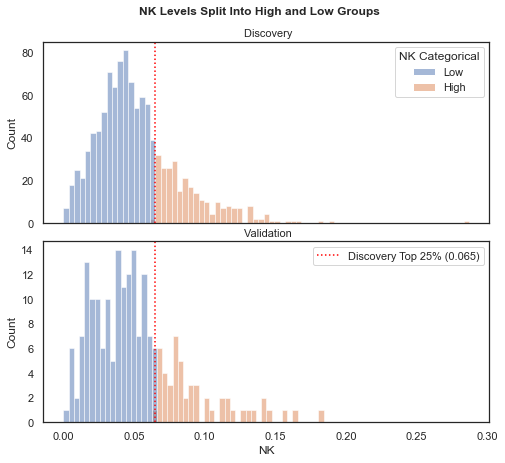

In [31]:
# Set up the matplotlib figure
sns.set_theme(style='white')
f, axs = plt.subplots(2, 1, sharex=True, figsize=(8,7))

# Define plots
sns.histplot(data=y_train,x=score_name, hue=score_name + ' Categorical', ax=axs[0], bins=75)
sns.histplot(data=y_test,x=score_name, hue=score_name + ' Categorical', ax=axs[1], bins=50)

# Set specs
cutoff = np.quantile(y_train[score_name],0.75)

for i in range(2):
    axs[i].axvline(cutoff, linestyle="dotted",color='red', label='Discovery Top 25% ('+ round(cutoff,3).astype(str)+ ')')

axs[0].set_title(' Discovery', loc='center', pad=5, fontsize=11)
axs[1].set_title(' Validation', loc='center', pad=5, fontsize=11)

axs[1].legend()
    # Define Plot Specs
plt.subplots_adjust(wspace=0, hspace=0.1)
plt.suptitle(score_name + ' Levels Split Into High and Low Groups',
                 fontsize='medium', y=0.95,
                 fontweight='bold')
plt.savefig('../Figures/Bar_Plots/'+score_name+'_Classifier_Strategy.png',
                    bbox_inches='tight', dpi=300)

plt.show()

## Box Plots

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

High Risk vs. Standard Risk: Kruskal-Wallis independent samples (pairwise between groups) with Bonferroni correction, P_val:1.768e-02 Stat=7.583e+00
Standard Risk vs. Low Risk: Kruskal-Wallis independent samples (pairwise between groups) with Bonferroni correction, P_val:7.972e-02 Stat=4.918e+00
High Risk vs. Low Risk: Kruskal-Wallis independent samples (pairwise between groups) with Bonferroni correction, P_val:3.839e-05 Stat=1.904e+01


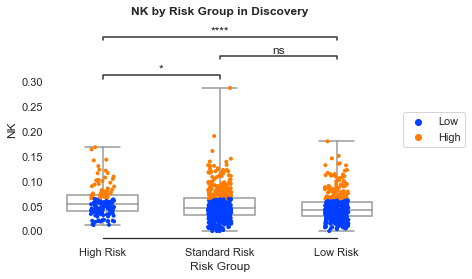

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

High Risk vs. Standard Risk: Kruskal-Wallis independent samples (pairwise between groups) with Bonferroni correction, P_val:6.910e-01 Stat=1.439e+00
Standard Risk vs. Low Risk: Kruskal-Wallis independent samples (pairwise between groups) with Bonferroni correction, P_val:1.784e-01 Stat=3.552e+00
High Risk vs. Low Risk: Kruskal-Wallis independent samples (pairwise between groups) with Bonferroni correction, P_val:9.241e-03 Stat=8.759e+00


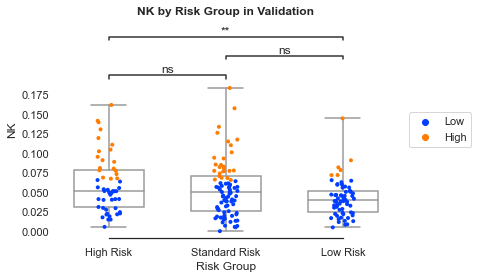

In [19]:
draw_boxplot(df=y_train,x='Risk Group', y=score_name,
                order=['High Risk', 'Standard Risk', 'Low Risk'],
                trialname='Discovery', hue=score_name +' Categorical',
                save_plot=True, figsize=None)

draw_boxplot(df=y_test,x='Risk Group', y=score_name,
                order=['High Risk', 'Standard Risk', 'Low Risk'],
                trialname='Validation', hue=score_name + ' Categorical',
                save_plot=True, figsize=None)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Positive vs. Negative: Kruskal-Wallis independent samples (pairwise between groups) with Bonferroni correction, P_val:2.039e-06 Stat=2.256e+01


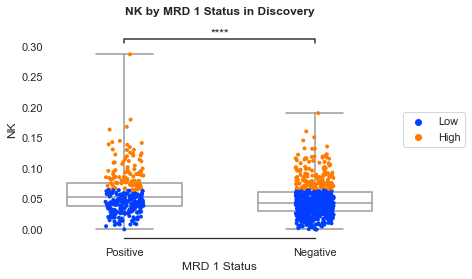

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Positive vs. Negative: Kruskal-Wallis independent samples (pairwise between groups) with Bonferroni correction, P_val:4.207e-04 Stat=1.244e+01


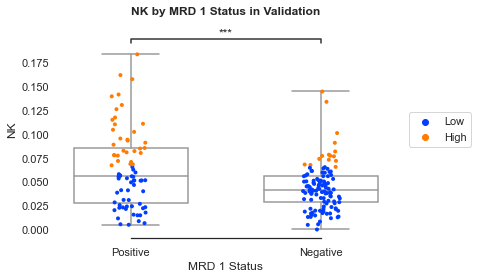

In [20]:
draw_boxplot(df=y_train,x='MRD 1 Status', y=score_name,
                order=['Positive','Negative'],
                trialname='Discovery', hue=score_name + ' Categorical',
                save_plot=True, figsize=None)

draw_boxplot(df=y_test,x='MRD 1 Status', y=score_name,
                order=['Positive','Negative'],
                trialname='Validation', hue=score_name + ' Categorical',
                save_plot=True, figsize=None)

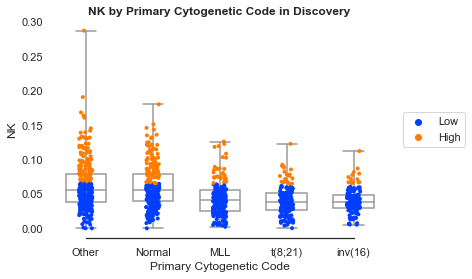

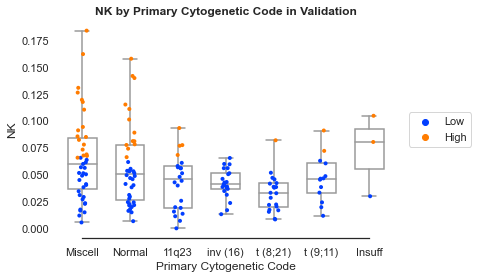

In [21]:
draw_boxplot(df=y_train,x='Primary Cytogenetic Code', y=score_name,
                order='auto',
                trialname='Discovery', hue=score_name + ' Categorical',
                save_plot=True, figsize=None)

draw_boxplot(df=y_test,x='Primary Cytogenetic Code', y=score_name,
                order='auto',
                trialname='Validation', hue=score_name + ' Categorical',
                save_plot=True, figsize=None)

## End